In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import matplotlib.cbook
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings('ignore')
logger = phoebe.logger('WARNING')
%matplotlib inline

In [2]:
b = phoebe.default_binary()

lc_w = np.loadtxt('lcdata_NSV.out',delimiter=',')
rv1_w = np.loadtxt('rv1data_NSV.out',delimiter=',')
rv2_w = np.loadtxt('rv2data_NSV.out',delimiter=',')



Thu, 09 Sep 2021 19:45 matplotlib.axes._axes WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


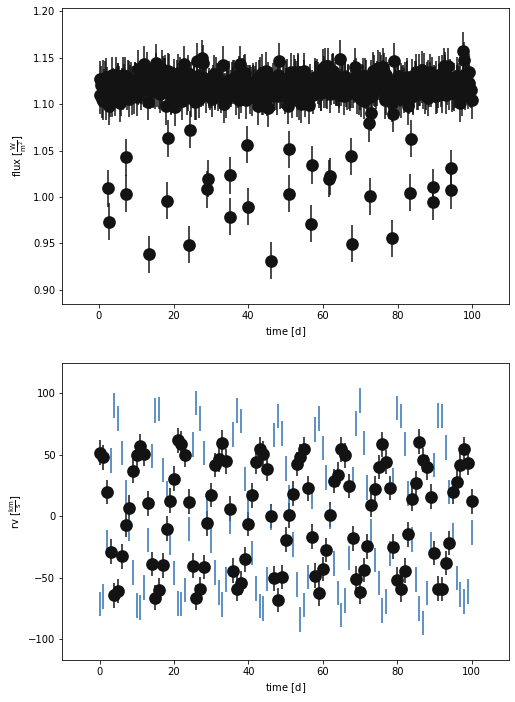

In [3]:
b.add_dataset('lc', times = lc_w[1:500,0], fluxes=lc_w[1:500,1], sigmas=lc_w[1:500,2],dataset='lc01', passband='Johnson:V',overwrite=True)
b.add_dataset('rv',dataset='rv01',overwrite=True)
b['times@rv01@primary'], b['rvs@rv01@primary'], b['sigmas@rv01@primary'] = rv1_w[:,0], rv1_w[:,1], rv1_w[:,2]
b['times@rv01@secondary'], b['rvs@rv01@secondary'], b['sigmas@rv01@secondary'] = rv2_w[:,0], rv2_w[:,1], rv2_w[:,2]
_ = b.plot(x='times', show=True)

## rv_periodogram

In [4]:
b.add_solver('estimator.rv_periodogram', solver='rvperiod',overwrite=True)

<ParameterSet: 8 parameters | qualifiers: sample_periods, samples_per_peak, comments, rv_datasets, algorithm, component, nyquist_factor, sample_mode>

In [5]:
b.set_value('sample_mode', context='solver', solver='rvperiod', value='manual')
b.set_value('sample_periods', context='solver', solver='rvperiod', value=np.linspace(8,12,1000))

In [6]:
b.run_solver('rvperiod', solution='rvperiod_solution',overwrite=True)
print(b['rvperiod_solution'])

ParameterSet: 11 parameters
R  period@rvperiod_solution@so...: [12.         11.995996   11.99199199
 ...  8.00800801  8.004004
  8.        ] d
R  power@rvperiod_solution@sol...: [0.01766487 0.01858394 0.01952982 ...
 0.00486912 0.00498688 0.00510205]
   period_factor@rvperiod_solu...: 1.0
R  fitted_uniqueids@rvperiod_s...: ['xlUgvprgaqwqtSmOAxabrbzwQFcoTd']
R  fitted_twigs@rvperiod_solut...: ['period@binary@orbit@component']
R  fitted_values@rvperiod_solu...: [10.87487487]
R  fitted_units@rvperiod_solut...: ['d']
   adopt_parameters@rvperiod_s...: ['period@binary@orbit@component']
   adopt_distributions@rvperio...: False
   adopt_values@rvperiod_solut...: True
   comments@rvperiod_solution@...: 


In [7]:
b.adopt_solution('rvperiod_solution')

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING solution='rvperiod_solution' is not included in run_checks_solution@setting, so will not raise interactive warnings


<ParameterSet: 16 parameters | contexts: component, dataset>

Thu, 09 Sep 2021 19:45 matplotlib.axes._axes WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


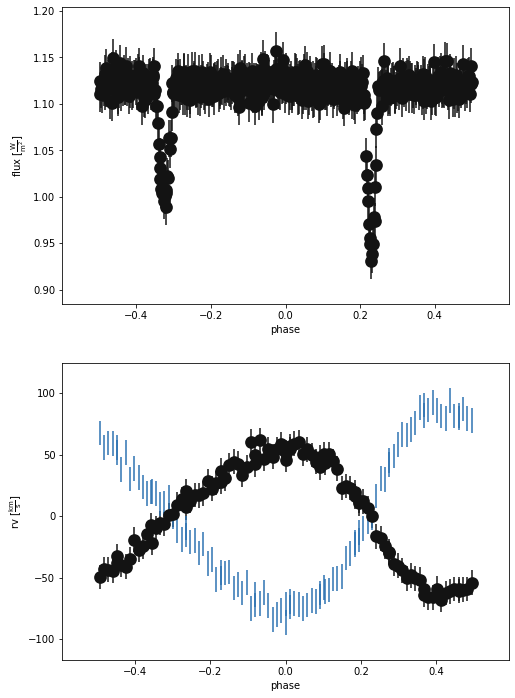

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [8]:
b.plot(x='phases',show=True)

## rv_geometry

In [9]:
b.add_solver('estimator.rv_geometry',
             rv_datasets='rv01',solver='rvsolver',overwrite=True)

<ParameterSet: 6 parameters | qualifiers: phase_bin, expose_model, orbit, comments, rv_datasets, phase_nbins>

In [10]:
b.run_solver(solver='rvsolver', solution='rv_geom_sol',overwrite=True)

<ParameterSet: 18 parameters | components: primary, secondary>

In [11]:
print(b.adopt_solution('rv_geom_sol', trial_run=True))

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING solution='rv_geom_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 2.349218749497297 d
         q@binary@orbit@component: 0.7257926490827437
     asini@binary@orbit@component: 32.92260499169138 solRad
       ecc@binary@orbit@component: 0.1619219455770454
      per0@binary@orbit@component: 106.32514309965494 deg
                    vgamma@system: 0.06917010833222297 km / s


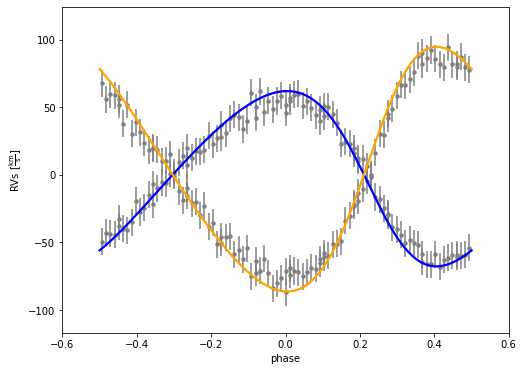

In [12]:
afig, mplfig = b.plot(solution='rv_geom_sol',show=True)

## EBAI and lc_geometry

In [13]:
b.add_solver('estimator.lc_geometry',solver='lcgeom_solver',overwrite=True)

<ParameterSet: 8 parameters | qualifiers: phase_bin, expose_model, lc_combine, orbit, lc_datasets, comments, phase_nbins, t0_near_times>

In [14]:
b.run_solver(solver='lcgeom_solver', solution='lc_geom_sol',overwrite=True)

<ParameterSet: 22 parameters | qualifiers: fitted_units, fitted_uniqueids, adopt_parameters, primary_depth, secondary_phase, analytic_fluxes, adopt_distributions, orbit, adopt_values, primary_phase, fitted_twigs, input_sigmas, analytic_phases, fitted_values, primary_width, input_phases, eclipse_edges, comments, input_fluxes, secondary_depth, analytic_best_model, secondary_width>

In [15]:
print(b.filter('lc01'))

ParameterSet: 27 parameters
               times@lc01@dataset: [ 0.2  0.4  0.6 ... 99.4 99.6 99.8] d
              fluxes@lc01@dataset: [1.10978156 1.12655022 1.12072516 ... 1.11630785
 1.11531064 1.10388663] W / m2
            passband@lc01@dataset: Johnson:V
    intens_weighting@lc01@dataset: energy
       compute_times@lc01@dataset: [] d
C     compute_phases@lc01@dataset: []
           phases_t0@lc01@dataset: t0_supconj
        mask_enabled@lc01@dataset: True
         mask_phases@lc01@dataset: []
        solver_times@lc01@dataset: auto
              sigmas@lc01@dataset: [0.02 0.02 0.02 ... 0.02 0.02 0.02] W / m2
          sigmas_lnf@lc01@dataset: -inf
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2
             exptime@lc01@dataset: 0.0 s
    enabled@lc01@phoebe01@compute: True
      fti_method@phoebe01@compute: none
     ld_mode@primary@lc01@dataset:

In [16]:
print(b.adopt_solution('lc_geom_sol', trial_run=True))

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING solution='lc_geom_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


ParameterSet: 3 parameters
   t0_supconj@binary@orbit@com...: 2.4998810118323216 d
       ecc@binary@orbit@component: 0.14975488594889497
      per0@binary@orbit@component: 125.30152685701964 deg


In [17]:
b.adopt_solution('lc_geom_sol', adopt_parameters='mask_phases')

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING solution='lc_geom_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


<ParameterSet: 1 parameters>

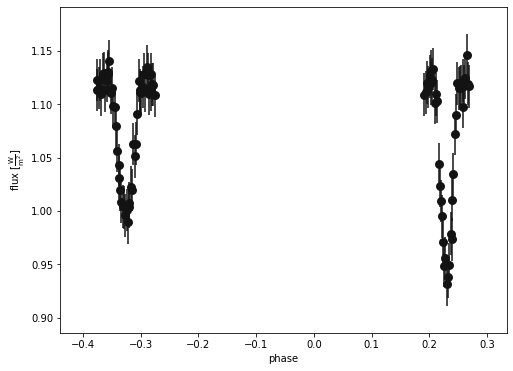

In [18]:
_ = b.plot(context='dataset', dataset='lc01', x='phases', show=True)

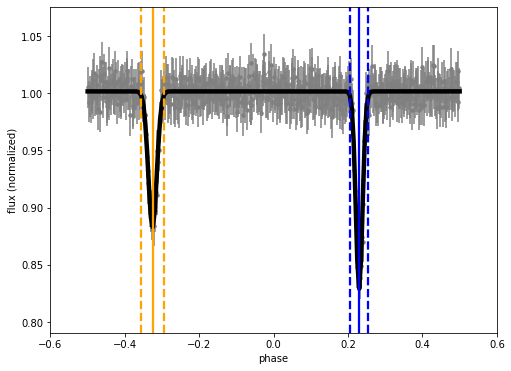

In [19]:
afig, mplfig = b.plot(solution='lc_geom_sol',
                      show=True)

In [20]:
b.set_value('mask_enabled@lc01', False)

In [21]:
b.add_solver('estimator.ebai',solver='ebaisol',overwrite=True)

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING adding teffratio constraint to binary orbit (needed for ebai solver)
Thu, 09 Sep 2021 19:45 BUNDLE       WARNING adding requivsumfrac constraint to binary orbit (needed for ebai solver)


<ParameterSet: 6 parameters | qualifiers: phase_bin, lc_combine, orbit, lc_datasets, comments, phase_nbins>

In [22]:
b.run_solver(solver='ebaisol', solution='ebai_sol',overwrite=True)

<ParameterSet: 14 parameters | qualifiers: input_sigmas, ebai_fluxes, fitted_units, fitted_uniqueids, orbit, adopt_parameters, fitted_values, adopt_distributions, input_phases, comments, input_fluxes, ebai_phases, adopt_values, fitted_twigs>

In [23]:
print(b.adopt_solution('ebai_sol', trial_run=True))

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING solution='ebai_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 2.5005005005004963 d
   teffratio@binary@orbit@comp...: 0.8881701405483933
   requivsumfrac@binary@orbit@...: 0.1627686113646432
     esinw@binary@orbit@component: 0.058353275038710684
     ecosw@binary@orbit@component: -0.09094926971528916
      incl@binary@orbit@component: 84.00132732731453 deg


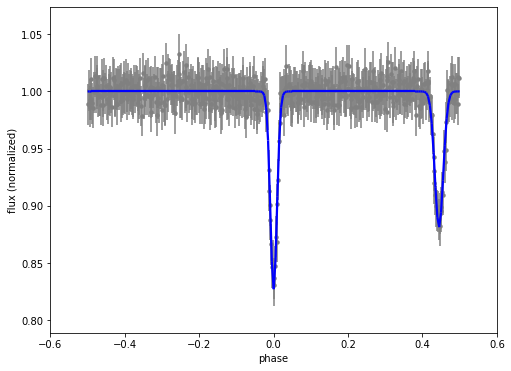

In [24]:
afig, mplfig = b.plot(solution='ebai_sol',x='phases',t0='t0_supconj',
                      show=True, )

In [25]:
b.flip_constraint('asini@binary', solve_for='sma@binary')
b.adopt_solution('rv_geom_sol')

Thu, 09 Sep 2021 19:45 BUNDLE       WARNING solution='rv_geom_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings
Thu, 09 Sep 2021 19:45 PARAMETERS   WARNING wrapping value of mean_anom to 270.5682955042405 deg


<ParameterSet: 25 parameters | contexts: dataset, component, system>

In [26]:
b.adopt_solution('lc_geom_sol')

Thu, 09 Sep 2021 19:46 BUNDLE       WARNING solution='lc_geom_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings
Thu, 09 Sep 2021 19:46 PARAMETERS   WARNING wrapping value of mean_anom to 251.0065754187175 deg


<ParameterSet: 12 parameters | contexts: component, dataset>

In [27]:
b.flip_constraint('teffratio', solve_for='teff@primary')
b.flip_constraint('requivsumfrac', solve_for='requiv@primary')
b.adopt_solution('ebai_sol', adopt_parameters=['teffratio', 'requivsumfrac', 'incl'])

Thu, 09 Sep 2021 19:46 BUNDLE       WARNING solution='ebai_sol' is not included in run_checks_solution@setting, so will not raise interactive warnings


<ParameterSet: 18 parameters | kinds: orbit, star>

In [28]:
print(b.filter(qualifier=['ecc','t0_supconj', 'per0', 'teff', 'sma', 'incl', 'q', 'requiv'], context='component'))

ParameterSet: 14 parameters
C        requiv@primary@component: 4.3882711637980245 solRad
C          teff@primary@component: 6755.462412072703 K
C          incl@primary@component: 84.00132732731453 deg
       requiv@secondary@component: 1.0 solRad
         teff@secondary@component: 6000.0 K
C        incl@secondary@component: 84.00132732731453 deg
            per0@binary@component: 125.30152685701964 deg
             ecc@binary@component: 0.14975488594889497
      t0_supconj@binary@component: 2.4998810118323216 d
            incl@binary@component: 84.00132732731453 deg
               q@binary@component: 0.7257926490827437
C            sma@binary@component: 33.10387130923494 solRad
C           sma@primary@component: 13.922035457268828 solRad
C         sma@secondary@component: 19.18183585196611 solRad


b.add_feature('spot', component='primary', feature='spot01')
b.add_feature('spot', component='primary', feature='spot02')

b.set_value(qualifier='relteff', feature='spot01', value=0.98141)
b.set_value(qualifier='radius', feature='spot01', value=19.97)
b.set_value(qualifier='colat', feature='spot01', value=81.3)
b.set_value(qualifier='long', feature='spot01', value=18.2)

b.set_value(qualifier='relteff', feature='spot02', value=0.9801)
b.set_value(qualifier='radius', feature='spot02', value=14.5)
b.set_value(qualifier='colat', feature='spot02', value=34.9)
b.set_value(qualifier='long', feature='spot02', value= 286.31)

In [29]:
b.set_value_all('pblum_mode', 'dataset-scaled')

In [30]:
b.run_compute(model='after_estimators', overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████| 501/501 [03:33<00:00,  2.35it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

Thu, 09 Sep 2021 19:52 matplotlib.axes._axes WARNING *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


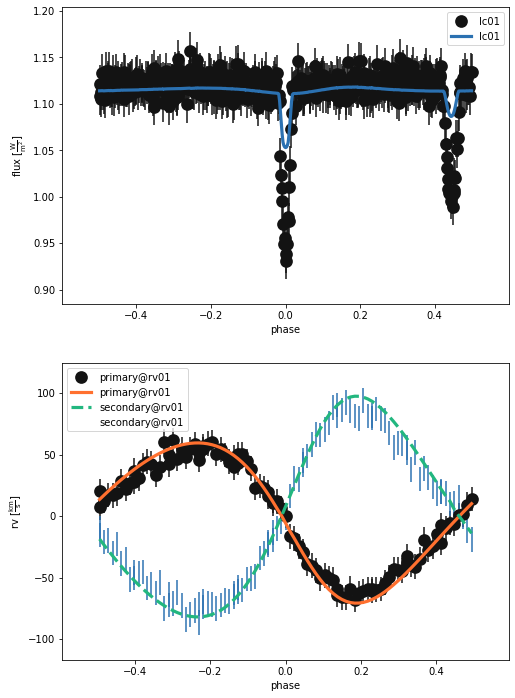

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [32]:
b.plot(x='phases',show=True,legend=True)

In [33]:
b.save('models/after_estimators.bundle')

'models/after_estimators.bundle'